   semana  temp_max  temp_min  humedad  lluvia_mm  rendimiento_kg
0       1      30.5      21.0       78       12.3             310
1       2      31.2      22.0       82        8.9             325
2       3      29.8      20.5       75       15.2             305
3       4      32.0      23.0       88        9.1             330
4       5      33.1      24.1       90        6.8             340
Shape X: (7, 3, 4)
Shape y: (7, 1)


C:\Users\carlo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


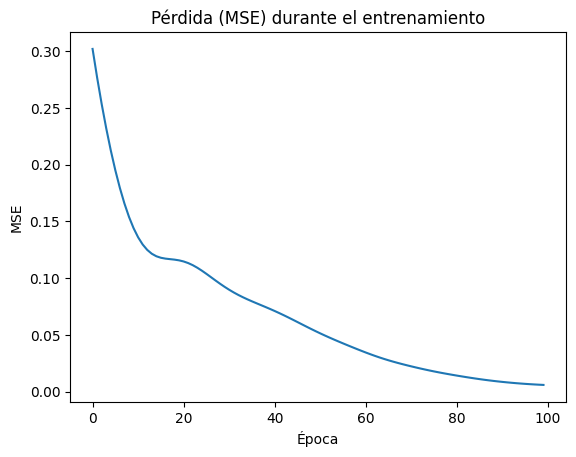

✅ Modelo RNN guardado como rnn_rendimiento.keras


In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 1. Cargar dataset
df = pd.read_csv("../data/raw/rendimiento_sintetico.csv")
print(df.head())

# 2. Seleccionar variables
features = ["temp_max", "temp_min", "humedad", "lluvia_mm"]
target = "rendimiento_kg"

# 3. Normalizar datos
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_x.fit_transform(df[features])
y_scaled = scaler_y.fit_transform(df[[target]])

# 4. Preparar datos para RNN (formato [samples, timesteps, features])
X_seq = []
y_seq = []
time_steps = 3  # mirar 3 semanas hacia atrás

for i in range(time_steps, len(X_scaled)):
    X_seq.append(X_scaled[i-time_steps:i])
    y_seq.append(y_scaled[i])

X_seq, y_seq = np.array(X_seq), np.array(y_seq)

print("Shape X:", X_seq.shape)  # (samples, 3, 4)
print("Shape y:", y_seq.shape)  # (samples, 1)

# 5. Crear modelo RNN con LSTM
model = Sequential()
model.add(LSTM(64, activation='tanh', input_shape=(X_seq.shape[1], X_seq.shape[2])))
model.add(Dense(1))  # salida continua

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 6. Entrenar modelo
history = model.fit(X_seq, y_seq, epochs=100, verbose=0)

# 7. Graficar pérdida
plt.plot(history.history['loss'])
plt.title("Pérdida (MSE) durante el entrenamiento")
plt.xlabel("Época")
plt.ylabel("MSE")
plt.show()

# 8. Guardar modelo
model.save("../models/rnn_rendimiento.keras")
print("✅ Modelo RNN guardado como rnn_rendimiento.keras")
